In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:\\Users\\Delta\\Downloads\\sonar.all-data.csv - sonar.all-data.csv.csv")
df.head()

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [4]:
df.R.unique()

array(['R', 'M'], dtype=object)

In [5]:
x = df.drop(columns=["R"])
y = df.R

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=0)

In [8]:
from sklearn.naive_bayes import GaussianNB

In [11]:
model1 = GaussianNB()
model1.fit(xtrain, ytrain)

GaussianNB()

In [12]:
ypred = model1.predict(xtest)

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

<AxesSubplot:>

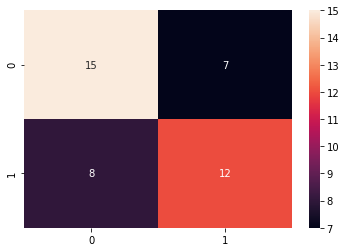

In [17]:
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot=True)

In [25]:
print("accuracy is {}".format(accuracy_score(ytest,ypred)))

accuracy is 0.6428571428571429


In [26]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           M       0.65      0.68      0.67        22
           R       0.63      0.60      0.62        20

    accuracy                           0.64        42
   macro avg       0.64      0.64      0.64        42
weighted avg       0.64      0.64      0.64        42



In [28]:
from sklearn.naive_bayes import MultinomialNB

In [31]:
model2 = MultinomialNB()
model2.fit(xtrain, ytrain)
ypred=model2.predict(xtest)

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

accuracy score : 0.5714285714285714


'              precision    recall  f1-score   support\n\n           M       0.57      0.77      0.65        22\n           R       0.58      0.35      0.44        20\n\n    accuracy                           0.57        42\n   macro avg       0.57      0.56      0.55        42\nweighted avg       0.57      0.57      0.55        42\n'

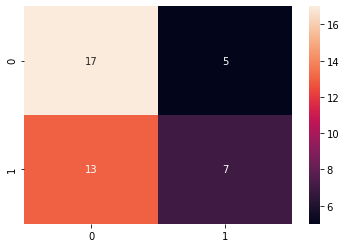

In [36]:
cm =confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot=True)
print("accuracy score : {}".format(accuracy_score(ytest, ypred)))
classification_report(ytest, ypred)

In [37]:
from sklearn.svm import SVC
model3 = SVC(c=1)

In [38]:
model3.fit(xtrain, ytrain)
ypred = model3.predict(xtest)

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Accuracy score: 0.7619047619047619


'              precision    recall  f1-score   support\n\n           M       0.73      0.86      0.79        22\n           R       0.81      0.65      0.72        20\n\n    accuracy                           0.76        42\n   macro avg       0.77      0.76      0.76        42\nweighted avg       0.77      0.76      0.76        42\n'

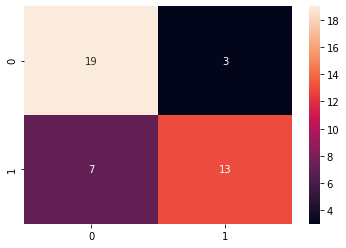

In [41]:
cm = confusion_matrix(ytest, ypred)
sns.heatmap(cm, annot=True)
print("Accuracy score: {}".format(accuracy_score(ytest, ypred)))
classification_report(ytest, ypred)

In [42]:
#svm hyper parameter tunning
model4 = SVC()
kernel = ["linear", 'poly', 'rbf', 'sigmoid']
c = [1,0.1,0.01,0.001]
grid=dict(kernel=kernel,C=c)

In [44]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats =3, random_state=1)
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(estimator=model4, param_grid = grid, cv = cv, scoring="accuracy")
res=grid_cv.fit(xtrain,ytrain)
print(res.best_params_)
print(res.best_score_)

{'C': 1, 'kernel': 'poly'}
0.8444444444444444


In [46]:
from sklearn.svm import SVC
model5=SVC(C=1,kernel='poly')
model5.fit(xtrain,ytrain)
ypred=model5.predict(xtest)

Accuracy is: 0.7857142857142857
              precision    recall  f1-score   support

           M       0.76      0.86      0.81        22
           R       0.82      0.70      0.76        20

    accuracy                           0.79        42
   macro avg       0.79      0.78      0.78        42
weighted avg       0.79      0.79      0.78        42



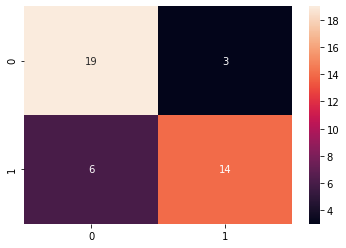

In [47]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
acc=accuracy_score(ytest,ypred)
print("Accuracy is:",acc)
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
model6 = KNeighborsClassifier(n_neighbors=5)
model6.fit(xtrain, ytrain)

KNeighborsClassifier()

In [67]:
ypred = model6.predict(xtest)

Accuracy is : 0.7380952380952381
              precision    recall  f1-score   support

           M       0.70      0.86      0.78        22
           R       0.80      0.60      0.69        20

    accuracy                           0.74        42
   macro avg       0.75      0.73      0.73        42
weighted avg       0.75      0.74      0.73        42



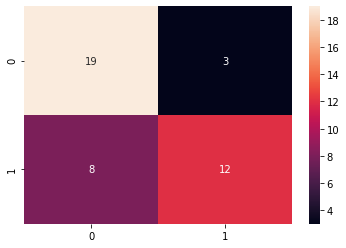

In [68]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

In [69]:
#Tuning of KNN parameters 

model7=KNeighborsClassifier()
n_neighbors=range(1,31)
weights =['uniform', 'distance']
metric=["minkowski","euclidean","manhattan"]
grid=dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
#cv
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=1)
#GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_cv=GridSearchCV(estimator=model7,param_grid=grid,cv=cv,scoring="accuracy")
res=grid_cv.fit(xtrain,ytrain)

In [70]:
res.best_score_

0.8565656565656565

In [71]:
res.best_params_

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

In [72]:
from sklearn.neighbors import KNeighborsClassifier
model8=KNeighborsClassifier(n_neighbors=1,metric='manhattan',weights= 'uniform')
model8.fit(xtrain,ytrain)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [73]:
ypred=model8.predict(xtest)

Accuracy is : 0.8333333333333334
              precision    recall  f1-score   support

           M       0.83      0.86      0.84        22
           R       0.84      0.80      0.82        20

    accuracy                           0.83        42
   macro avg       0.83      0.83      0.83        42
weighted avg       0.83      0.83      0.83        42



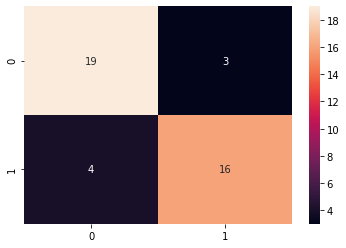

In [74]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

In [ ]:
#Accuracy of NaiveBayes - Guassian -------------- model1 -- 64.28 %
#Accuracy of NaiveBayes - Multinomial ----------- model2 -- 57.14 %
#Accuracy of SVM -------------------------------- model3 -- 76.19 %
#Accuracy after SVM hyper parameter tuning------- model5 -- 78.57 %
#Accuracy of KNN -------------------------------- model6 -- 73.80 %
#Accuracy after KNN parameter tuning ------------ model8 -- 83.33 %